# OpenAI Gym (Q-learning algorithm)
https://www.kaggle.com/charel/learn-by-example-reinforcement-learning-with-gym

## Setup

In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Look at the Taxi-v2 env

In [2]:
env = gym.make('Taxi-v2')
env.env.s = 26
env.render()
env.close()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



__Actions__:
- 0: move south
- 1: move north
- 2: move east 
- 3: move west 
- 4: pick up passenger
- 5: drop off passenger

__Rendering__:
- blue: passenger
- magenta: destination
- yellow: empty taxi
- green: full taxi
- |: wall
- other letters: locations

## Q-learning algorithm
* The Q-learning algorithm is centered around the actor (in our case the Taxi);
* It does not require a model of the environment (__model-free__ method);
* It is an __off-policy__ RL algorithm: a different policy is used for value evaluation than what is used to select the next action;  
https://stats.stackexchange.com/questions/184657/what-is-the-difference-between-off-policy-and-on-policy-learning
* It learns by trail and error and updates Q-matrix based on reward.

### Bellman Equation (extended with a learning rate)
https://en.wikipedia.org/wiki/Q-learning

$Q^{new}(s_{t}, a_{t}) = (1 - \alpha) Q(s_{t}, a_{t}) + \alpha (R_{t+1} + \gamma \max \limits_{a} Q(s_{t+1}, a))$  

- $Q$: Function that calculates the quality of a state-action combination.
- $R_{t+1}$: Reward received when moving from the state $s_{t}$ to the state $s_{t+1}$.
- $\alpha$: Learning rate, where $0 < \alpha \leq 1$. It determines to what extent newly acquired information overrides old information.
- $\gamma$: Discount factor between 0 and 1. Higher $\gamma$ means a higher focus on long term rewards.

In [3]:
env = gym.make('Taxi-v2')

In [4]:
NUM_ACTIONS = env.action_space.n
NUM_STATES = env.observation_space.n
print(f'NUM_ACTIONS: {NUM_ACTIONS}')
print(f'NUM_STATES: {NUM_STATES}')

NUM_ACTIONS: 6
NUM_STATES: 500


In [5]:
Q = np.zeros([NUM_STATES, NUM_ACTIONS])
gamma = 0.9
lr = 0.9

In [6]:
def Q_learning(env, num_episodes=1000):
    stats = {}
    for episode in range(1, num_episodes + 1):
        iteration = 0
        total_reward = 0
        done = False
        s = env.reset()
        
        while not done:
            a = np.argmax(Q[s, :])
            s_next, reward, done, _ = env.step(a)
            Q[s, a] = (1 - lr) * Q[s, a] + lr * (reward + gamma * np.max(Q[s_next, :]))
            s = s_next
            
            iteration += 1
            total_reward += reward
        
        stats[episode] = (iteration, total_reward)
        if (episode == 1) or (episode % 100 == 0):
            print(f'Episode: {episode}, iterations: {iteration}, reward: {total_reward}')
            
    return stats
            
def solve_game(env, Q, s=404):
    total_reward = 0
    done = False
    
    env.reset()
    env.env.s = s
    env.render()
    
    while not done:
        a = np.argmax(Q[s, :])
        s_next, reward, done, _ = env.step(a)
        s = s_next
        env.render()
        print(f'reward: {reward}')
        total_reward += reward
        
    print(f'total reward: {total_reward}')

Episode: 1, iterations: 200, reward: -632
Episode: 100, iterations: 52, reward: -31
Episode: 200, iterations: 78, reward: -57
Episode: 300, iterations: 12, reward: 9
Episode: 400, iterations: 16, reward: 5
Episode: 500, iterations: 14, reward: 7
Episode: 600, iterations: 12, reward: 9
Episode: 700, iterations: 14, reward: 7
Episode: 800, iterations: 13, reward: 8
Episode: 900, iterations: 13, reward: 8
Episode: 1000, iterations: 10, reward: 11


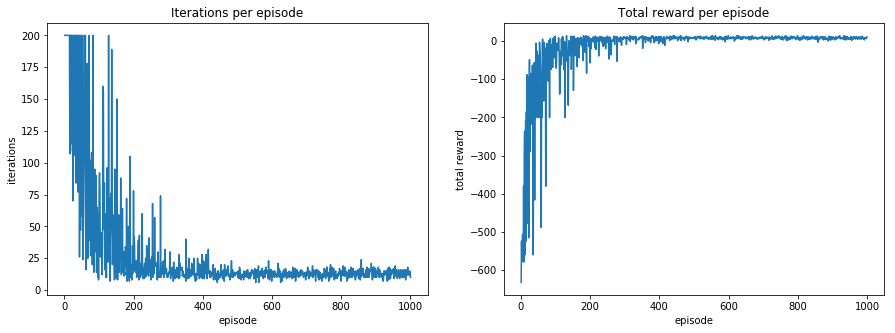

In [7]:
stats = Q_learning(env)

iterations_per_episode = np.array([stats[episode][0] for episode in sorted(stats.keys())])
total_reward_per_episode = np.array([stats[episode][1] for episode in sorted(stats.keys())])

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Iterations per episode')
plt.plot(np.arange(len(iterations_per_episode)) + 1, iterations_per_episode)
plt.xlabel('episode')
plt.ylabel('iterations')

plt.subplot(1, 2, 2)
plt.title('Total reward per episode')
plt.plot(np.arange(len(total_reward_per_episode)) + 1, total_reward_per_episode)
plt.xlabel('episode')
plt.ylabel('total reward')
plt.show()

In [8]:
solve_game(env, Q)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
reward: -1
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
reward: -1
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
reward: -1
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
reward: -1
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
reward: -1
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
reward: -1
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
reward: -1
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
reward: -1
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+------